# Quarter Wave Transformer

<h3>Design a quarter wave tranformer to match a $100 \Omega$  load to a $50 \Omega$ transmission line. Plot $|\Gamma|$ values by $f/f_{o}$.
</h3>

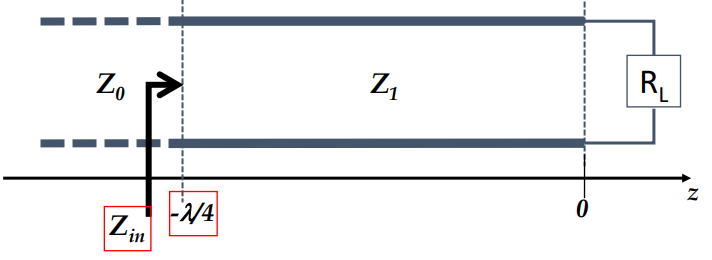

In [8]:
from IPython.display import Image
Image(filename="files/microwave_tline.png")

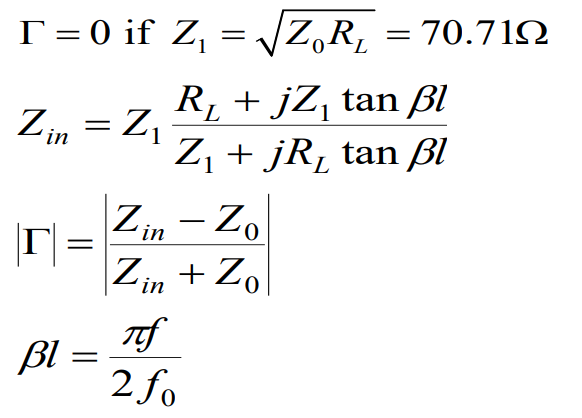

In [9]:
Image(filename="files/formula.png")

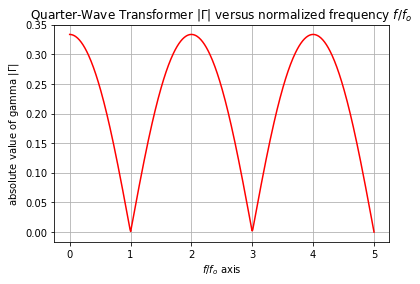

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import tan,pi
import cmath


def abs_gamma_func(f_by_fo):
    """Get value f_by_fo list as a parameter and return gamma_abs_list"""

    z_nought = 100 # characteristic impedance
    #print("z_nought: ", z_nought)

    r_load = 50 # load impedance
    #print("r_load: ", r_load)

    z_1 = (z_nought * r_load)**0.5 
    #print("z_1: ", z_1)

    gamma_abs_list = list() #initializing the list
    
    for item in f_by_fo:
        """iterate f_by_fo list with item and calculate absolute value of gamma""" 
         #print("f/fo: ", item)
        
        beta_l = (pi / 2) * item
        #print("beta_l: ", beta_l)

        z_in =  z_1 * complex(r_load,z_1*tan(beta_l)) / (complex(z_1,r_load*tan(beta_l)))
        #print("z_in: ",z_in)

        gamma_abs = abs( (z_in - z_nought) / (z_nought + z_in) )
        #print("gamma_abs: ",gamma_abs)
        
        gamma_abs_list.append(gamma_abs)
        #print(gamma_abs_list)
        #print("---------------")
   
    return gamma_abs_list


#Plotting 

start_point = 0.0
end_point = 5.0
sampling = 500

x= np.linspace(start_point, end_point, sampling) # solution for cant create float list from range() method
y= np.linspace(start_point, end_point, sampling) # x and y input sizes have to be equal

a = 50
title = ("Quarter-Wave Transformer $|\Gamma|$ versus normalized frequency $f/f_{o}$ ")
plt.plot(x , abs_gamma_func(y), color = "r" )
plt.title(title)  
plt.xlabel("$f/f_{o}$ axis") 
plt.ylabel("absolute value of gamma $|\Gamma|$") 
plt.grid()
plt.show()